In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
Pclass: passenger class.
Name, Sex, Age: self-explanatory
SibSp: how many siblings & spouses of the passenger aboard the Titanic.
Parch: how many children & parents of the passenger aboard the Titanic.
Ticket: ticket id
Fare: price paid (in pounds)
Cabin: passenger's cabin number
Embarked: where the passenger embarked the Titanic

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin has 687 missing data and age has 177 missing data

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 passenger has survived and 549 has died among 891 total passenger

In [9]:
train_data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

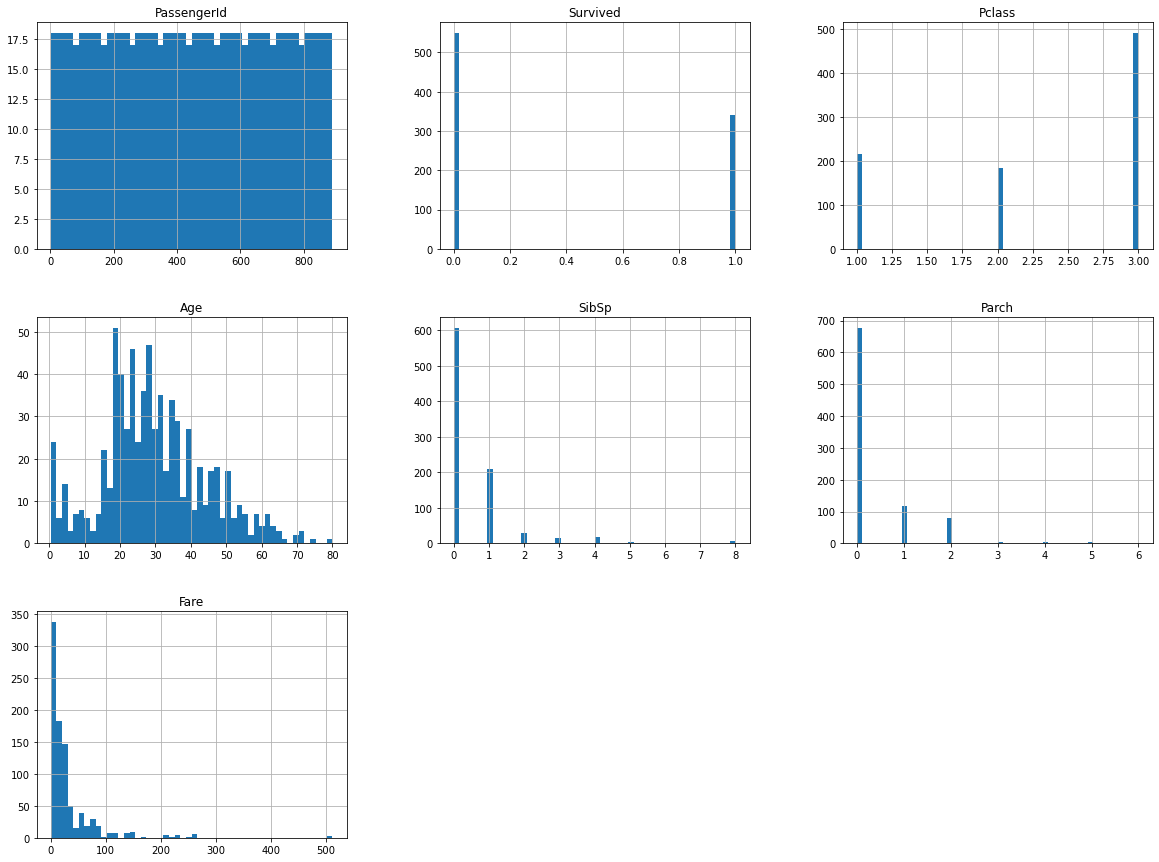

In [11]:
train_data.hist(bins=50,figsize=(20,15))

plt.show()

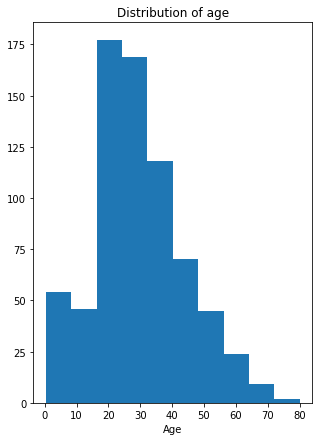

In [12]:
plt.figure(figsize=(5,7))
plt.hist(train_data['Age'])
plt.title('Distribution of age')
plt.xlabel('Age')
plt.show()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

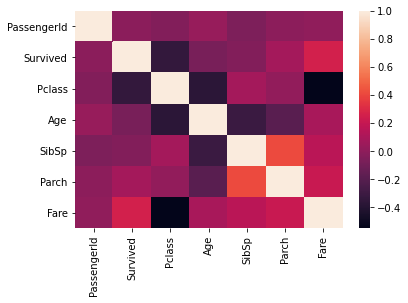

In [13]:
print(train_data.corr())
sns.heatmap(train_data.corr())

<AxesSubplot:xlabel='Survived', ylabel='Age'>

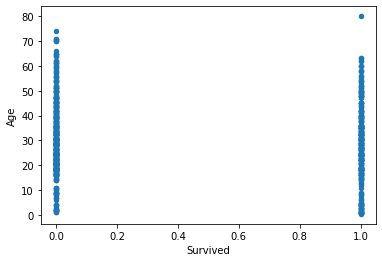

In [14]:
train_data.plot(kind="scatter",x="Survived",y="Age")

Its clear that people between age 0> to 62+ has been survied and people between age 0> to 68+ has been died.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

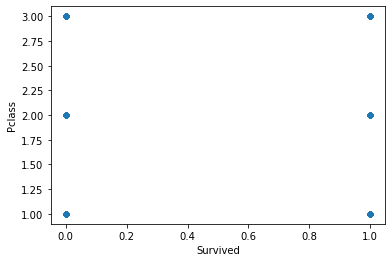

In [15]:
train_data.plot(kind="scatter",x="Survived",y="Pclass")

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_data.drop('PassengerId', axis=1, inplace=True)

<AxesSubplot:>

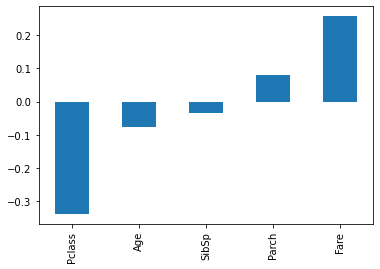

In [18]:
train_data.corr()['Survived'].sort_values()[:-1].plot.bar()

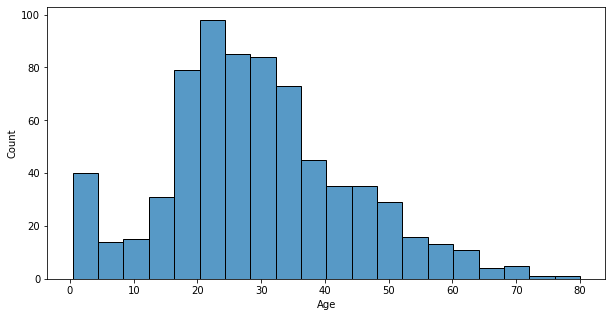

In [19]:
plt.figure(figsize= (10,5))
sns.histplot(train_data['Age'])
plt.show()

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [22]:
num_pipeline.fit_transform(train_data)


array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [23]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [26]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [27]:

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [28]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [29]:

y_train = train_data["Survived"]

In [30]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [31]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [32]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=3,scoring="accuracy")

In [33]:
svm_scores

array([0.67003367, 0.7037037 , 0.74410774])

74% accuracy!

In [35]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(svm_clf,X_train,y_train,cv=3)

In [36]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_train,y_train_pred)

array([[445, 104],
       [158, 184]], dtype=int64)

In [37]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train,y_train_pred)

0.6388888888888888

In [38]:
recall_score(y_train,y_train_pred)

0.5380116959064327

In [39]:
from sklearn.metrics import f1_score

f1_score(y_train,y_train_pred)

0.5841269841269842

In [40]:

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

In [42]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [43]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [45]:
cross_val_score(svm_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.81818182, 0.83838384, 0.82491582])

In [46]:
y_train_pred - cross_val_predict(svm_clf,x_train_scaled,y_train,cv=3)

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1, -1,  0,  0,  1, -1,  0,
        0,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  1,
        0,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,
        0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1, -1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  1,  1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  1,  0

In [47]:
conf_mx= confusion_matrix(y_train,y_train_pred)
conf_mx

array([[445, 104],
       [158, 184]], dtype=int64)

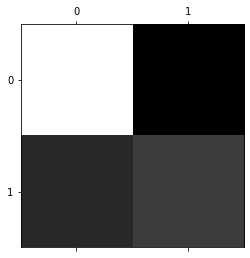

In [48]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()